# 보스턴 주택가격 예측분석 ver1

## ✔ 데이터 전처리

### 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기

In [2]:
train_df = pd.read_csv('boston_train.csv')
test_df = pd.read_csv('boston_test.csv')

### 불필요한 컬럼 삭제
* train에서 삭제했다면 test도 함께 삭제해야됨

In [3]:
train_df.drop(['Street','Alley','Utilities','Condition2','RoofMatl','BsmtFinType2',
'BsmtFinSF2','Heating','LowQualFinSF','WoodDeckSF','OpenPorchSF',
'PoolArea','PoolQC','MiscFeature','MiscVal','MoSold','YrSold'], axis = 'columns', inplace=True)

test_df.drop(['Street','Alley','Utilities','Condition2','RoofMatl','BsmtFinType2',
'BsmtFinSF2','Heating','LowQualFinSF','WoodDeckSF','OpenPorchSF',
'PoolArea','PoolQC','MiscFeature','MiscVal','MoSold','YrSold'], axis = 'columns', inplace=True)

### 범주형변수 더미화
* Python에서는 범주형변수를 더미화해야함 → get_dummies
* 더미화 후 원래의 컬럼은 삭제 진행 → 꼭 삭제하지 않아도 됨

In [4]:
# Train 데이터 범주형 변수 더미화
dummy_list = list(train_df.select_dtypes(include =['object']).columns)
dummies = pd.get_dummies(train_df[dummy_list], prefix = dummy_list)
train_df.drop(dummy_list, axis = 1, inplace = True)
X = pd.concat([train_df, dummies], axis = 1)

# Test 데이터 데이터 범주형 변수 더미화
dummy_list = list(test_df.select_dtypes(include =['object']).columns)
dummies = pd.get_dummies(test_df[dummy_list], prefix = dummy_list)
test_df.drop(dummy_list, axis = 1, inplace = True)
Y = pd.concat([test_df, dummies], axis = 1)

* X와 Y의 컬럼수가 다름 → 확인 필요

In [5]:
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [6]:
Y

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


### Missing값 처리
* null값이 있다면 해당 값을 0으로 대체

In [7]:
# Train 데이터에서 Missing값 개수 확인
cols=list(train_df)
for col in list(train_df):
    if (train_df[col].isnull().sum())==0:
        cols.remove(col)
    else:
        pass
print(len(cols))
# 3개

# Test 데이터에서 Missing값 개수 확인
cols=list(test_df)
for col in list(test_df):
    if (test_df[col].isnull().sum())==0:
        cols.remove(col)
    else:
        pass
print(len(cols))
# 10개

3
10


In [8]:
# Missing값이 있는 컬럼들
cols

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  FlrSF_1st      1460 non-null   int64  
 13  FlrSF_2nd      1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1444 non-null   float64
 9   BsmtFinSF1     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  FlrSF_1st      1459 non-null   int64  
 13  FlrSF_2nd      1459 non-null   int64  
 14  GrLivArea      1459 non-null   int64  
 15  BsmtFullBath   1457 non-null   float64
 16  BsmtHalfBath   1457 non-null   float64
 17  FullBath       1459 non-null   int64  
 18  HalfBath

In [11]:
# Train 데이터 Missing값을 0으로 처리
for col in ('LotFrontage', 'MasVnrArea', 'GarageYrBlt'):
    train_df[col] = train_df[col].fillna(0)

# Test 데이터 Missing값을 0으로 처리
for col in ('BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea'):
    test_df[col] = test_df[col].fillna(0)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  FlrSF_1st      1460 non-null   int64  
 13  FlrSF_2nd      1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   BsmtFinSF1     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  FlrSF_1st      1459 non-null   int64  
 13  FlrSF_2nd      1459 non-null   int64  
 14  GrLivArea      1459 non-null   int64  
 15  BsmtFullBath   1459 non-null   float64
 16  BsmtHalfBath   1459 non-null   float64
 17  FullBath       1459 non-null   int64  
 18  HalfBath

## ✔ 모델링

### 분석변수 / 타겟변수 준비

In [14]:
data = train_df.drop('SalePrice', axis=1).values
target = train_df['SalePrice'].values

### 패키지 호출

In [15]:
from sklearn.linear_model import Lasso

### Lasso 모델 구축

In [16]:
Lasso = Lasso()
Lasso.fit(data, target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.963e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

### 스코어링 및 제출

In [17]:
predict = Lasso.predict(test_df)
result =pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predict
})
result.to_csv('result_Lasso.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


# ver2

## ✔ 전처리

### 라이브러리 호출

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기

In [19]:
train_df = pd.read_csv('boston_train.csv')
test_df = pd.read_csv('boston_test.csv')

### 불필요한 컬럼 삭제

In [20]:
train_df.drop(['Street','Alley','Utilities','Condition2','RoofMatl','BsmtFinType2',
'BsmtFinSF2','Heating','LowQualFinSF','WoodDeckSF','OpenPorchSF',
'PoolArea','PoolQC','MiscFeature','MiscVal','MoSold','YrSold'], axis = 'columns', inplace=True)

test_df.drop(['Street','Alley','Utilities','Condition2','RoofMatl','BsmtFinType2',
'BsmtFinSF2','Heating','LowQualFinSF','WoodDeckSF','OpenPorchSF',
'PoolArea','PoolQC','MiscFeature','MiscVal','MoSold','YrSold'], axis = 'columns', inplace=True)

### 타겟변수 확인

<ipython-input-21-131fbce3cb3b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'], fit=norm, ax=ax1)  # 오른꼬리가 길게 생기는 그래프가 생성됨
<ipython-input-21-131fbce3cb3b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train_df['SalePrice']), fit=norm, ax=ax2)  # log함수를 사용하여 정규화 

<Axes: xlabel='SalePrice', ylabel='Density'>

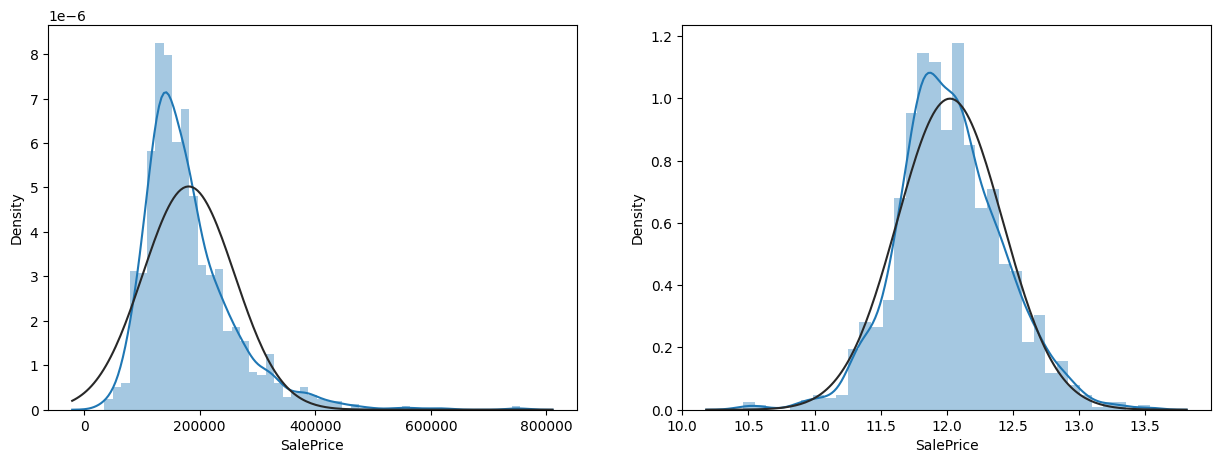

In [21]:
# Target 변수 확인
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,5)
sns.distplot(train_df['SalePrice'], fit=norm, ax=ax1)  # 오른꼬리가 길게 생기는 그래프가 생성됨
sns.distplot(np.log(train_df['SalePrice']), fit=norm, ax=ax2)  # log함수를 사용하여 정규화 진행

<ipython-input-22-5cb66eee740d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=train_df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')


<Axes: >

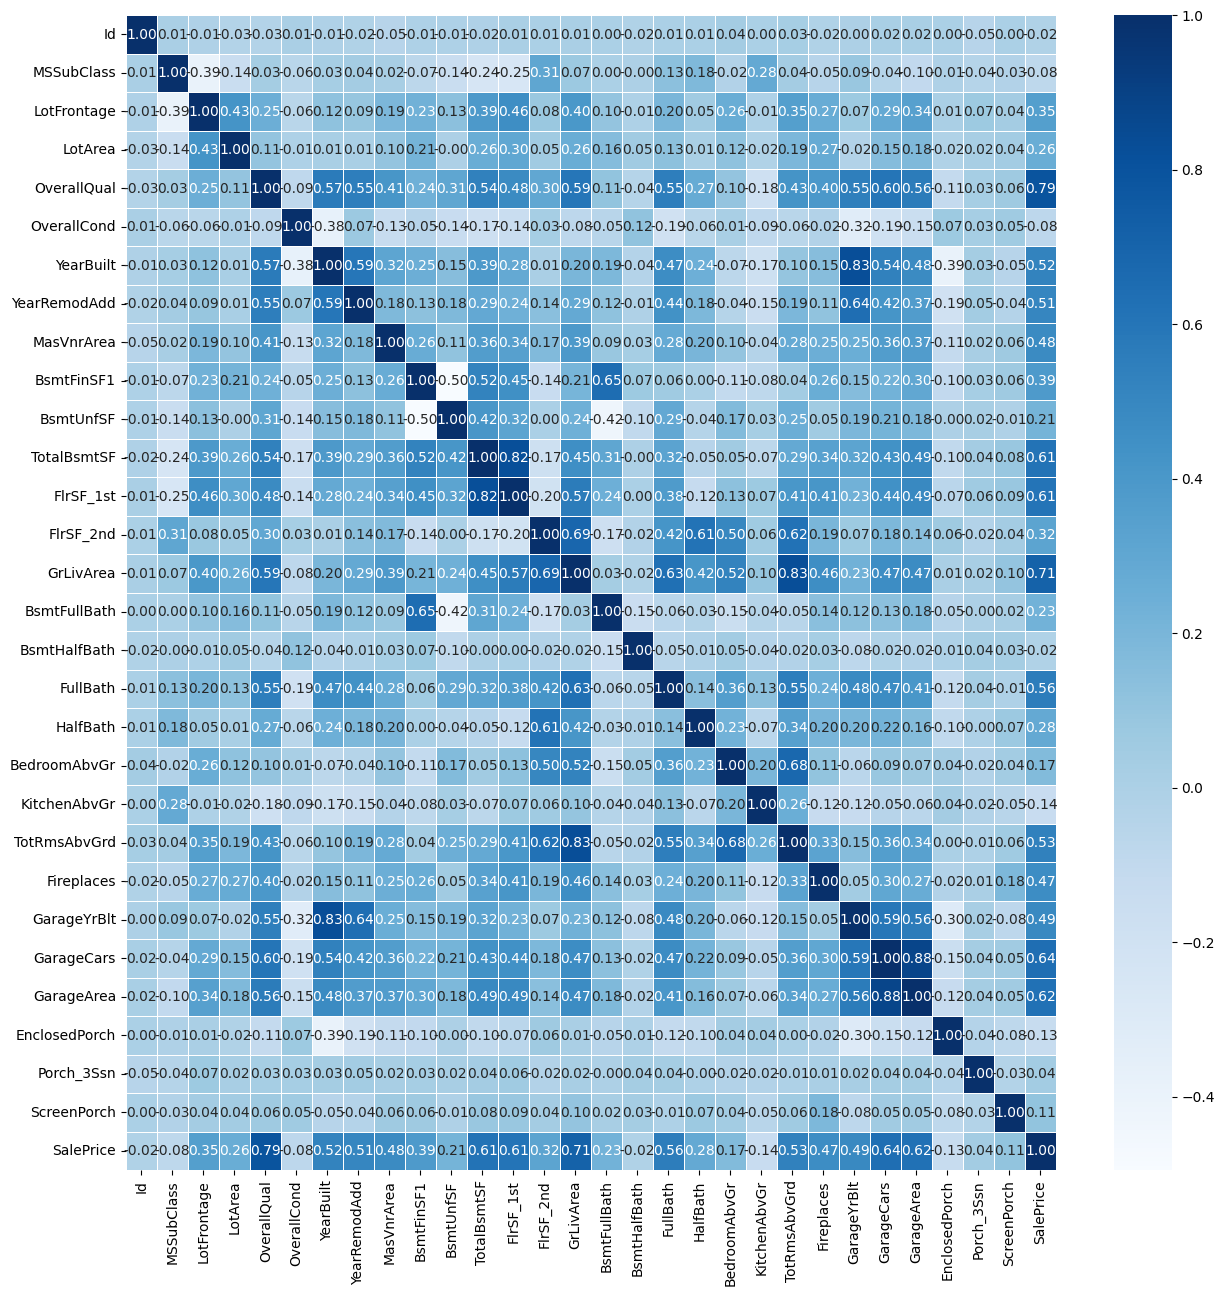

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(data=train_df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

### 파생변수 만들기

#### 외부 컨디션
* 외부 컨디션에 대한 변수 중 범주형으로 되어있는 변수를 가공

In [23]:
Condition_var = ['OverallQual','OverallCond','ExterQual','ExterCond']
Condition_Ex = train_df[Condition_var]

Condition_Ex = Condition_Ex.replace(to_replace='Ex',value = 5)
Condition_Ex = Condition_Ex.replace(to_replace='Gd',value = 4)
Condition_Ex = Condition_Ex.replace(to_replace='TA',value = 3)
Condition_Ex = Condition_Ex.replace(to_replace='Fa',value = 2)
Condition_Ex = Condition_Ex.replace(to_replace='Po',value = 1)
Condition_Ex = Condition_Ex.replace(to_replace='None',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='NA',value = 0)

In [24]:
# New_var1 파생변수 생성
train_df['New_var1'] = Condition_Ex['OverallQual'] + Condition_Ex['OverallCond'] + Condition_Ex['ExterQual'] + Condition_Ex['ExterCond']

In [25]:
Condition_var = ['OverallQual','OverallCond','ExterQual','ExterCond']
Condition_Ex = test_df[Condition_var]

Condition_Ex = Condition_Ex.replace(to_replace='Ex',value = 5)
Condition_Ex = Condition_Ex.replace(to_replace='Gd',value = 4)
Condition_Ex = Condition_Ex.replace(to_replace='TA',value = 3)
Condition_Ex = Condition_Ex.replace(to_replace='Fa',value = 2)
Condition_Ex = Condition_Ex.replace(to_replace='Po',value = 1)
Condition_Ex = Condition_Ex.replace(to_replace='None',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='NA',value = 0)

In [26]:
test_df['New_var1'] = Condition_Ex['OverallQual'] + Condition_Ex['OverallCond'] + Condition_Ex['ExterQual'] + Condition_Ex['ExterCond']

In [27]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,EnclosedPorch,Porch_3Ssn,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice,New_var1
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,TA,Y,0,0,0,NaN,WD,Normal,208500,19
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,TA,Y,0,0,0,NaN,WD,Normal,181500,20
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,TA,Y,0,0,0,NaN,WD,Normal,223500,19
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,TA,Y,272,0,0,NaN,WD,Abnorml,140000,18
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,TA,Y,0,0,0,NaN,WD,Normal,250000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,...,TA,Y,0,0,0,NaN,WD,Normal,175000,17
1456,1457,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,...,TA,Y,0,0,0,MnPrv,WD,Normal,210000,18
1457,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,...,TA,Y,0,0,0,GdPrv,WD,Normal,266500,25
1458,1459,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,...,TA,Y,112,0,0,NaN,WD,Normal,142125,17


#### 내부 면적
* 이상치(Outliar) 제거

In [28]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,EnclosedPorch,Porch_3Ssn,ScreenPorch,SalePrice,New_var1
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,6.517808,0.613014,1978.506164,1.767123,472.980137,21.954110,3.409589,15.060959,180921.195890,18.154110
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,1.625393,0.644666,24.689725,0.747315,213.804841,61.119149,29.317331,55.757415,79442.502883,2.149059
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,6.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,129975.000000,17.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,0.000000,0.000000,163000.000000,18.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,7.000000,1.000000,2002.000000,2.000000,576.000000,0.000000,0.000000,0.000000,214000.000000,19.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,14.000000,3.000000,2010.000000,4.000000,1418.000000,552.000000,508.000000,480.000000,755000.000000,29.000000


In [29]:
train_df=train_df.drop(train_df[(train_df['TotalBsmtSF'] > 3000) | (train_df['FlrSF_1st'] > 3000) | (train_df['GrLivArea'] > 4500)].index)

In [30]:
# 내부 면적에 대한 변수들 값을 더하여 총 내부 면적 값을 구하여 New_var2 파생변수 만들기
train_df['New_var2'] = train_df['TotalBsmtSF'] + train_df['FlrSF_1st'] + train_df['FlrSF_2nd'] + train_df['GrLivArea']
test_df['New_var2'] = test_df['TotalBsmtSF'] + test_df['FlrSF_1st'] + test_df['FlrSF_2nd'] + test_df['GrLivArea']

#### 욕실 개수

In [31]:
# FullBath는 그대로 / HalfBath는 % 2 진행
train_df['New_var3'] = train_df['BsmtFullBath'] + train_df['BsmtHalfBath']/2 + train_df['FullBath'] + train_df['HalfBath']/2
test_df['New_var3'] = test_df['BsmtFullBath'] + test_df['BsmtHalfBath']/2 + test_df['FullBath'] + test_df['HalfBath']/2

#### 지하실 상태
* 지하실 상태는 모든 변수가 범주형변수이기 때문에 아래와 같이 진행

In [32]:
Under_Cond_var1 = ['BsmtQual','BsmtCond']
Under_Cond_Ex1 = train_df[Under_Cond_var1]

Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Ex',value = 5)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Gd',value = 4)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='TA',value = 3)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Fa',value = 2)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Po',value = 1)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='None',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='NA',value = 0)

Under_Cond_var2 = ['BsmtExposure','BsmtFinType1']
Under_Cond_Ex2 = train_df[Under_Cond_var2]

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Gd',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Av',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Mn',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='No',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='None',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='NA',value = 0)

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='GLQ',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='ALQ',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='BLQ',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Rec',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='LwQ',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Unf',value = 1)

train_df['New_var4'] = Under_Cond_Ex1['BsmtQual'] + Under_Cond_Ex1['BsmtCond'] +Under_Cond_Ex2['BsmtExposure'] + Under_Cond_Ex2['BsmtFinType1']

In [33]:
Under_Cond_var1 = ['BsmtQual','BsmtCond']
Under_Cond_Ex1 = test_df[Under_Cond_var1]

Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Ex',value = 5)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Gd',value = 4)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='TA',value = 3)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Fa',value = 2)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Po',value = 1)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='None',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='NA',value = 0)

Under_Cond_var2 = ['BsmtExposure','BsmtFinType1']
Under_Cond_Ex2 = test_df[Under_Cond_var2]

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Gd',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Av',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Mn',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='No',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='None',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='NA',value = 0)

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='GLQ',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='ALQ',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='BLQ',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Rec',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='LwQ',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Unf',value = 1)

test_df['New_var4'] = Under_Cond_Ex1['BsmtQual'] + Under_Cond_Ex1['BsmtCond'] +Under_Cond_Ex2['BsmtExposure'] + Under_Cond_Ex2['BsmtFinType1']

#### 부지 평탄도
* 기울어짐 or 기울어지지 않음 → 0과 1로 이진 분류

In [34]:
Land_var = ['LotShape','LandContour']
Land_Ex = train_df[Land_var]

Land_Ex = Land_Ex.replace(to_replace='IR1',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR2',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR3',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Reg',value = 1)

Land_Ex = Land_Ex.replace(to_replace='None',value = 0)
Land_Ex = Land_Ex.replace(to_replace='',value = 0)
Land_Ex = Land_Ex.replace(to_replace='NA',value = 0)

Land_Ex = Land_Ex.replace(to_replace='Bnk',value = 0)
Land_Ex = Land_Ex.replace(to_replace='HLS',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Low',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Lvl',value = 1)

train_df['New_var5'] = Land_Ex['LotShape'] + Land_Ex['LandContour']

In [35]:
Land_var = ['LotShape','LandContour']
Land_Ex = test_df[Land_var]

Land_Ex = Land_Ex.replace(to_replace='IR1',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR2',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR3',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Reg',value = 1)

Land_Ex = Land_Ex.replace(to_replace='None',value = 0)
Land_Ex = Land_Ex.replace(to_replace='',value = 0)
Land_Ex = Land_Ex.replace(to_replace='NA',value = 0)

Land_Ex = Land_Ex.replace(to_replace='Bnk',value = 0)
Land_Ex = Land_Ex.replace(to_replace='HLS',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Low',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Lvl',value = 1)

test_df['New_var5'] = Land_Ex['LotShape'] + Land_Ex['LandContour']

#### 차고 상태

In [36]:
Garage_var = ['GarageFinish','GarageQual','GarageCond']
Garage_Ex = train_df[Garage_var]

Garage_Ex = Garage_Ex.replace(to_replace='Ex',value = 5)
Garage_Ex = Garage_Ex.replace(to_replace='Gd',value = 4)
Garage_Ex = Garage_Ex.replace(to_replace='TA',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='Fa',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Po',value = 1)
Garage_Ex = Garage_Ex.replace(to_replace='None',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='NA',value = 0)

Garage_Ex = Garage_Ex.replace(to_replace='Fin',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='RFn',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Unf',value = 1)

train_df['New_var6'] = Garage_Ex['GarageFinish'] + Garage_Ex['GarageQual'] + Garage_Ex['GarageCond']

In [37]:
Garage_var = ['GarageFinish','GarageQual','GarageCond']
Garage_Ex = test_df[Garage_var]

Garage_Ex = Garage_Ex.replace(to_replace='Ex',value = 5)
Garage_Ex = Garage_Ex.replace(to_replace='Gd',value = 4)
Garage_Ex = Garage_Ex.replace(to_replace='TA',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='Fa',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Po',value = 1)
Garage_Ex = Garage_Ex.replace(to_replace='None',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='NA',value = 0)

Garage_Ex = Garage_Ex.replace(to_replace='Fin',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='RFn',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Unf',value = 1)

test_df['New_var6'] = Garage_Ex['GarageFinish'] + Garage_Ex['GarageQual'] + Garage_Ex['GarageCond']

#### 건축연도

In [38]:
train_df['New_var7'] = ((2020 - train_df['YearBuilt']) + (2020 - train_df['YearRemodAdd'])) / 2
test_df['New_var7'] = ((2020 - test_df['YearBuilt']) + (2020 - test_df['YearRemodAdd'])) / 2

#### Missing값, NA값 처리
- 파생변수에 사용되었던 변수들 삭제



In [39]:
# Train 파생변수 관련 변수 drop
train_df.drop(['OverallQual','OverallCond','ExterQual','ExterCond',
               'TotalBsmtSF','FlrSF_1st','FlrSF_2nd','GrLivArea',
               'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
               'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'LotShape','LandContour',
               'GarageFinish','GarageQual','GarageCond',
               'YearBuilt','YearRemodAdd','Electrical'], axis = 'columns', inplace=True)

In [40]:
# Test 파생변수 관련 변수 drop
test_df.drop(['OverallQual','OverallCond','ExterQual','ExterCond',
               'TotalBsmtSF','FlrSF_1st','FlrSF_2nd','GrLivArea',
               'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
               'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'LotShape','LandContour',
               'GarageFinish','GarageQual','GarageCond',
               'YearBuilt','YearRemodAdd','Electrical'], axis = 'columns', inplace=True)

In [41]:
for col in ('MasVnrType','FireplaceQu','GarageType','Fence'):
    train_df[col] = train_df[col].fillna('None')

for col in ('New_var1','New_var2','New_var3','New_var4','New_var5','New_var6','New_var7', 'LotFrontage','MasVnrArea','GarageYrBlt', 'BsmtFinSF1' ,'GarageCars', 'GarageArea', 'BsmtUnfSF'):
    train_df[col] = train_df[col].fillna(0)

for col in ('MSZoning', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional'):
    train_df[col] = train_df[col].fillna(test_df[col].mode()[0])

In [42]:
for col in ('MasVnrType','FireplaceQu','GarageType','Fence'):
    test_df[col] = test_df[col].fillna('None')

for col in ('New_var1','New_var2','New_var3','New_var4','New_var5','New_var6','New_var7', 'LotFrontage','MasVnrArea','GarageYrBlt', 'BsmtFinSF1' ,'GarageCars', 'GarageArea', 'BsmtUnfSF'):
    test_df[col] = test_df[col].fillna(0)

for col in ('MSZoning', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional'):
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

<ipython-input-43-5cb66eee740d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=train_df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')


<Axes: >

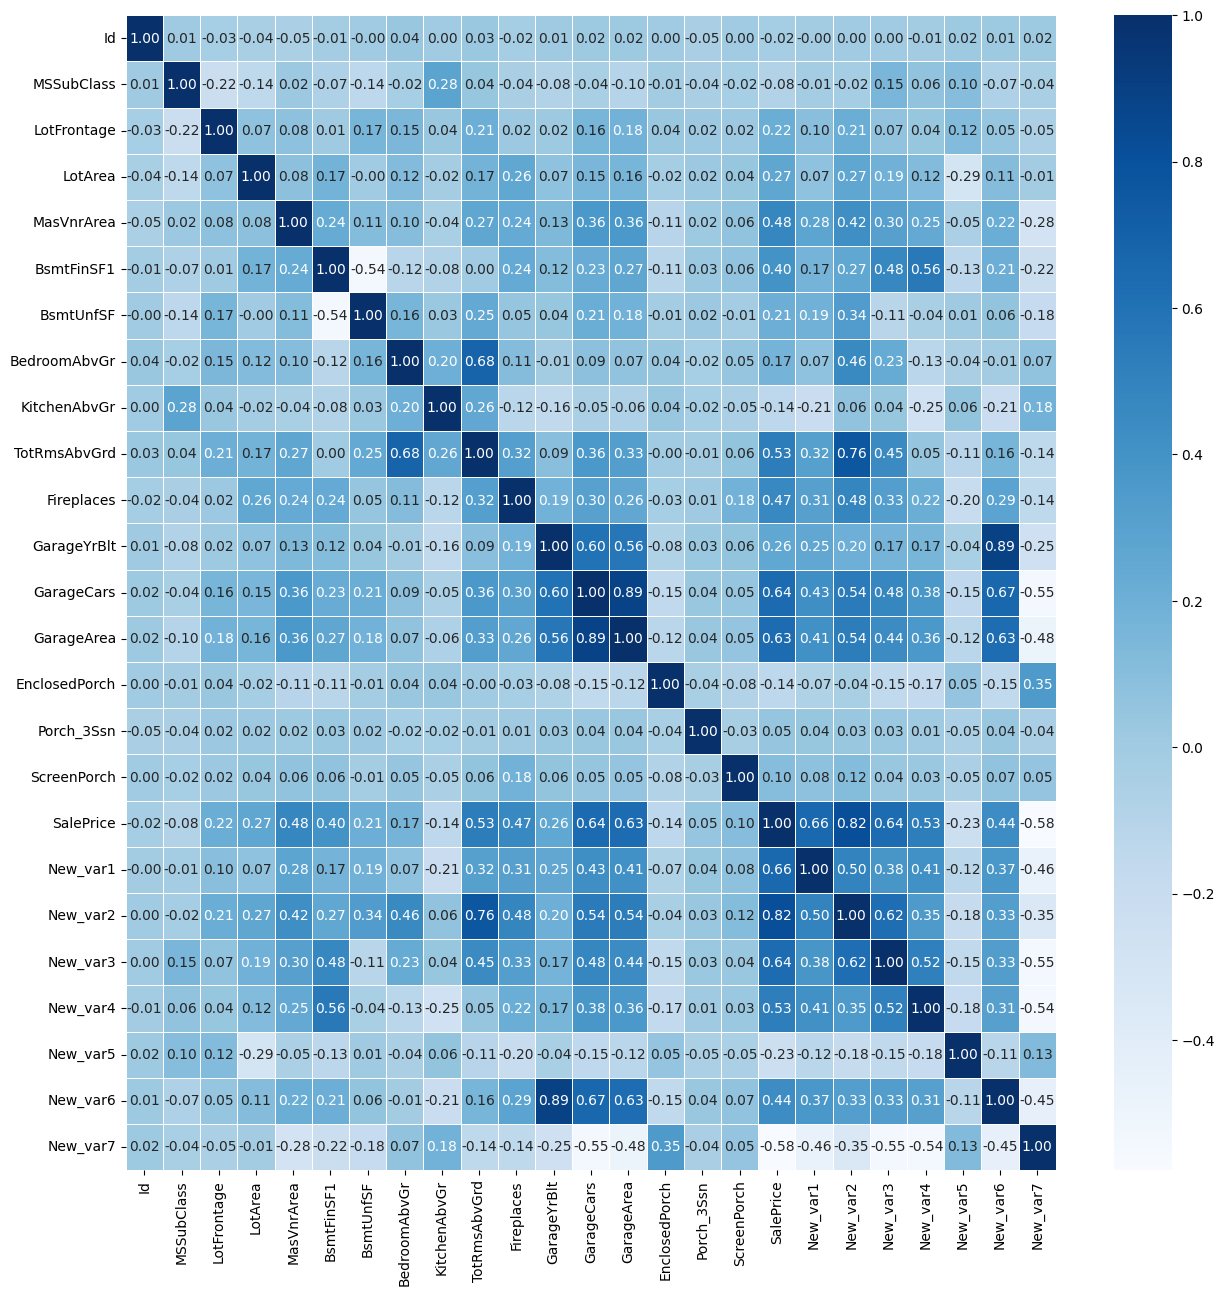

In [43]:
plt.figure(figsize=(15,15))
sns.heatmap(data=train_df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

### 범주형 변수 더미화

In [44]:
dummy_list = list(train_df.select_dtypes(include =['object']).columns)
dummies = pd.get_dummies(train_df[dummy_list], prefix = dummy_list)
train_df.drop(dummy_list, axis = 1, inplace = True)
X = pd.concat([train_df, dummies], axis = 1)

dummy_list = list(test_df.select_dtypes(include =['object']).columns)
dummies = pd.get_dummies(test_df[dummy_list], prefix = dummy_list)
test_df.drop(dummy_list, axis = 1, inplace = True)
X = pd.concat([test_df, dummies], axis = 1)

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1455 non-null   int64  
 1   MSSubClass     1455 non-null   int64  
 2   LotFrontage    1455 non-null   float64
 3   LotArea        1455 non-null   int64  
 4   MasVnrArea     1455 non-null   float64
 5   BsmtFinSF1     1455 non-null   int64  
 6   BsmtUnfSF      1455 non-null   int64  
 7   BedroomAbvGr   1455 non-null   int64  
 8   KitchenAbvGr   1455 non-null   int64  
 9   TotRmsAbvGrd   1455 non-null   int64  
 10  Fireplaces     1455 non-null   int64  
 11  GarageYrBlt    1455 non-null   float64
 12  GarageCars     1455 non-null   int64  
 13  GarageArea     1455 non-null   int64  
 14  EnclosedPorch  1455 non-null   int64  
 15  Porch_3Ssn     1455 non-null   int64  
 16  ScreenPorch    1455 non-null   int64  
 17  SalePrice      1455 non-null   int64  
 18  New_var1

In [46]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   MasVnrArea     1459 non-null   float64
 5   BsmtFinSF1     1459 non-null   float64
 6   BsmtUnfSF      1459 non-null   float64
 7   BedroomAbvGr   1459 non-null   int64  
 8   KitchenAbvGr   1459 non-null   int64  
 9   TotRmsAbvGrd   1459 non-null   int64  
 10  Fireplaces     1459 non-null   int64  
 11  GarageYrBlt    1459 non-null   float64
 12  GarageCars     1459 non-null   float64
 13  GarageArea     1459 non-null   float64
 14  EnclosedPorch  1459 non-null   int64  
 15  Porch_3Ssn     1459 non-null   int64  
 16  ScreenPorch    1459 non-null   int64  
 17  New_var1       1459 non-null   int64  
 18  New_var2

## ✔ 모델링

### 분석데이터 준비

In [47]:
train_target = train_df['SalePrice']
train_df = train_df[list(test_df)]
train_target = np.log(train_target)

### Lasso 모델 구축

#### Lasso 모델 불러오기

In [48]:
from sklearn.linear_model import Lasso

#### Lasso 모델 구축

In [49]:
Lasso = Lasso()
Lasso.fit(train_df, train_target)

Lasso()

#### 결과 데이터 생성

In [50]:
predict = Lasso.predict(test_df)
predict = np.exp(predict)
result =pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predict
})
result.to_csv('result_Lasso1.csv', index=False)

### Ridge

In [51]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
ridge = Ridge(alpha=1.0)
ridge.fit(train_df, train_target)

Ridge()

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

pred = ridge.predict(train_df)

ridge_R2 = r2_score(train_target, pred)
ridge_mae = mean_absolute_error(train_target, pred)

print(ridge_R2)
print(ridge_mae)

0.89829886074109
0.09018235074536513


In [54]:
predict = ridge.predict(test_df)
predict = np.exp(predict)
result =pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predict
})
result.to_csv('result_ridge.csv', index=False)

### GBM

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

In [56]:
gboost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gboost.fit(train_df, train_target)

GradientBoostingRegressor(random_state=42)

In [57]:
pred = gboost.predict(train_df)

gboost_R2 = r2_score(train_target, pred)
gboost_mae = mean_absolute_error(train_target, pred)

print(gboost_R2)
print(gboost_mae)

0.9458125000187114
0.065971481607555


In [58]:
predict = gboost.predict(test_df)
predict = np.exp(predict)
result =pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predict
})
result.to_csv('result_gboost.csv', index=False)